In [203]:
from datetime import datetime, timedelta
from zipfile import ZipFile
import pandas as pd
import calendar
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
option_data_folder = 'E:/projects/stock data/augmented2'
all_fnames = list(glob.glob(f'{option_data_folder}/*'))

In [34]:
stock_data = pd.read_csv('E:/projects/stock data/only_stock_prices.csv', index_col=['Symbol', 'DataDate'], parse_dates=['DataDate'])

In [198]:
def conv_days(row):
    diff = (row['ExpirationDate'] - row['DataDate'])
    if diff.days >= 365:
        return 365 * (diff.days // 365)
    elif diff.days >= 31:
        return 31 * (diff.days // 31)
    elif diff.days > 7:
        return 7 * (diff.days // 7)
    else:
        return diff.days

def conv_strike(row):
    diff = row['StrikePrice'] / row['UnderlyingPrice']
    if 0.9 <= diff <= 1.1:
        diff = diff - diff % 0.005
    else:
        diff = diff - diff % 0.05
    return diff - 1

def conv_profit(row):
    p = row['LastPrice'] # premium on option
    if row['PutCall'] == 'call':
        p += min(row['StrikePrice'], row['UnderlyingPriceAtExpiration']) - row['UnderlyingPrice']
    else:
        if row['UnderlyingPriceAtExpiration'] < row['StrikePrice']:
            p -= row['StrikePrice'] - row['UnderlyingPriceAtExpiration']
        else:
            pass
    return p / row['UnderlyingPrice']
        

In [206]:
stocks = {'OSTK', 'PINS', 'TWTR', 'AMD', 'TWLO', 'SPOT', 'FB', 'JNUG', 'NUGT', 'BA', 'BYND',
                              'PFE', 'ATVI', 'AAPL', 'ROKU', 'SFIX', 'SQ', 'TSLA', 'MMM', 'MSFT', 'LULU',
                              'NVDA', 'MA', 'BABA', 'CAT', 'AMAT', 'NFLX', 'PYPL', 'AXP', 'ABT', 'CRM',
                              'BAC', 'CME', 'DIS', 'V', 'NKE', 'CVS', 'PM', 'WMT', 'JNJ', 'HSY'}

In [199]:

piv_arr = []
for fname in all_fnames[::-1]:
    print(fname)
    df = pd.read_csv(fname, parse_dates=['ExpirationDate', 'DataDate'])
    df = df[~df['UnderlyingPriceAtExpiration'].isna()]
    df = df[df['PutCall'] == 'call']
    df = df[df['Symbol'].isin(stocks)]
    if len(df) == 0:
        continue
    
    df['diff_days'] = df.apply(conv_days, axis=1)
    df['diff_strike'] = df.apply(conv_strike, axis=1)
    df['expected_profit'] = df.apply(conv_profit, axis=1)

    df_summery = df[['diff_days', 'diff_strike', 'expected_profit']].groupby(['diff_days', 'diff_strike']).mean()
    df_summery = df_summery.reset_index()
    piv = df_summery.pivot(index='diff_strike', columns='diff_days', values='expected_profit')
    piv_arr.append(piv)

E:/projects/stock data/augmented2\D_20201009_OData2.csv
E:/projects/stock data/augmented2\D_20201009_OData1.csv
E:/projects/stock data/augmented2\D_20201008_OData2.csv
E:/projects/stock data/augmented2\D_20201008_OData1.csv
E:/projects/stock data/augmented2\D_20201007_OData2.csv
E:/projects/stock data/augmented2\D_20201007_OData1.csv
E:/projects/stock data/augmented2\D_20201006_OData2.csv
E:/projects/stock data/augmented2\D_20201006_OData1.csv
E:/projects/stock data/augmented2\D_20201005_OData2.csv
E:/projects/stock data/augmented2\D_20201005_OData1.csv
E:/projects/stock data/augmented2\D_20201002_OData2.csv
E:/projects/stock data/augmented2\D_20201002_OData1.csv
E:/projects/stock data/augmented2\D_20201001_OData2.csv
E:/projects/stock data/augmented2\D_20201001_OData1.csv
E:/projects/stock data/augmented2\D_20200930_OData2.csv
E:/projects/stock data/augmented2\D_20200930_OData1.csv
E:/projects/stock data/augmented2\D_20200929_OData2.csv
E:/projects/stock data/augmented2\D_20200929_ODa

E:/projects/stock data/augmented2\D_20200630_OData1.csv
E:/projects/stock data/augmented2\D_20200629_OData2.csv
E:/projects/stock data/augmented2\D_20200629_OData1.csv
E:/projects/stock data/augmented2\D_20200626_OData2.csv
E:/projects/stock data/augmented2\D_20200626_OData1.csv
E:/projects/stock data/augmented2\D_20200625_OData.csv
E:/projects/stock data/augmented2\D_20200624_OData.csv
E:/projects/stock data/augmented2\D_20200623_OData.csv
E:/projects/stock data/augmented2\D_20200622_OData.csv
E:/projects/stock data/augmented2\D_20200619_OData.csv
E:/projects/stock data/augmented2\D_20200618_OData.csv
E:/projects/stock data/augmented2\D_20200617_OData.csv
E:/projects/stock data/augmented2\D_20200616_OData.csv
E:/projects/stock data/augmented2\D_20200615_OData.csv
E:/projects/stock data/augmented2\D_20200612_OData.csv
E:/projects/stock data/augmented2\D_20200611_OData.csv
E:/projects/stock data/augmented2\D_20200610_OData.csv
E:/projects/stock data/augmented2\D_20200609_OData.csv
E:/pr

E:/projects/stock data/augmented2\D_20191206_OData.csv
E:/projects/stock data/augmented2\D_20191205_OData.csv
E:/projects/stock data/augmented2\D_20191204_OData.csv
E:/projects/stock data/augmented2\D_20191203_OData.csv
E:/projects/stock data/augmented2\D_20191202_OData.csv
E:/projects/stock data/augmented2\D_20191129_OData.csv
E:/projects/stock data/augmented2\D_20191128_OData.csv
E:/projects/stock data/augmented2\D_20191127_OData.csv
E:/projects/stock data/augmented2\D_20191126_OData.csv
E:/projects/stock data/augmented2\D_20191125_OData.csv
E:/projects/stock data/augmented2\D_20191122_OData.csv
E:/projects/stock data/augmented2\D_20191121_OData.csv
E:/projects/stock data/augmented2\D_20191120_OData.csv
E:/projects/stock data/augmented2\D_20191119_OData.csv
E:/projects/stock data/augmented2\D_20191118_OData.csv
E:/projects/stock data/augmented2\D_20191115_OData.csv
E:/projects/stock data/augmented2\D_20191114_OData.csv
E:/projects/stock data/augmented2\D_20191113_OData.csv
E:/project

E:/projects/stock data/augmented2\20190508_OData.csv
E:/projects/stock data/augmented2\20190507_OData.csv
E:/projects/stock data/augmented2\20190506_OData.csv
E:/projects/stock data/augmented2\20190503_OData.csv
E:/projects/stock data/augmented2\20190502_OData.csv
E:/projects/stock data/augmented2\20190501_OData.csv
E:/projects/stock data/augmented2\20190430_OData.csv
E:/projects/stock data/augmented2\20190429_OData.csv
E:/projects/stock data/augmented2\20190426_OData.csv
E:/projects/stock data/augmented2\20190425_OData.csv
E:/projects/stock data/augmented2\20190424_OData.csv
E:/projects/stock data/augmented2\20190423_OData.csv
E:/projects/stock data/augmented2\20190422_OData.csv
E:/projects/stock data/augmented2\20190419_OData.csv
E:/projects/stock data/augmented2\20190418_OData.csv
E:/projects/stock data/augmented2\20190417_OData.csv
E:/projects/stock data/augmented2\20190416_OData.csv
E:/projects/stock data/augmented2\20190415_OData.csv
E:/projects/stock data/augmented2\20190412_ODa

E:/projects/stock data/augmented2\20180925_OData.csv
E:/projects/stock data/augmented2\20180924_OData.csv
E:/projects/stock data/augmented2\20180921_OData.csv
E:/projects/stock data/augmented2\20180920_OData.csv
E:/projects/stock data/augmented2\20180919_OData.csv
E:/projects/stock data/augmented2\20180918_OData.csv
E:/projects/stock data/augmented2\20180917_OData.csv
E:/projects/stock data/augmented2\20180914_OData.csv
E:/projects/stock data/augmented2\20180913_OData.csv
E:/projects/stock data/augmented2\20180912_OData.csv
E:/projects/stock data/augmented2\20180911_OData.csv
E:/projects/stock data/augmented2\20180910_OData.csv
E:/projects/stock data/augmented2\20180907_OData.csv
E:/projects/stock data/augmented2\20180906_OData.csv
E:/projects/stock data/augmented2\20180905_OData.csv
E:/projects/stock data/augmented2\20180904_OData.csv
E:/projects/stock data/augmented2\20180831_OData.csv
E:/projects/stock data/augmented2\20180830_OData.csv
E:/projects/stock data/augmented2\20180829_ODa

KeyboardInterrupt: 

In [200]:
ddd = pd.concat(piv_arr)
findal_df = ddd.groupby('diff_strike').sum() / ddd.groupby('diff_strike').count()
for c in list(findal_df.columns):
    if c == 0:
        findal_df = findal_df.drop(columns={0})
        continue
    # estimate yearly cycles
    if c == 1:
        cycles = findal_df[c] * 52 * 5 # five times a week
    elif c == 2:
        cycles = findal_df[c] * 52 * 3 # 3 times a week
    elif c == 3:
        cycles = findal_df[c] * 52 * 2 # 2 times a week
    else:
        cycles = findal_df[c] * 52 * 5 / c
    findal_df[c] = findal_df[c] ** cycles
        
        
findal_df = findal_df[(findal_df.index > 0) & (findal_df.index < 0.3)]

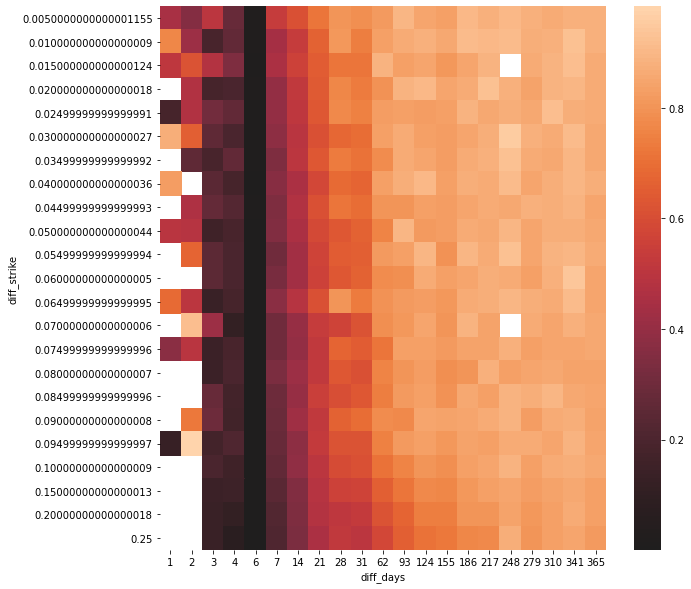

In [204]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(findal_df, center=0)

In [205]:
df = pd.read_csv('E:/projects/stock data/augmented2/20180827_OData.csv', parse_dates=['ExpirationDate', 'DataDate'])


In [229]:
ddf = df
ddf = ddf[~ddf['UnderlyingPriceAtExpiration'].isna()]
ddf = ddf[ddf['PutCall'] == 'call']
ddf = ddf[ddf['Symbol'].isin(stocks)]

ddf['diff_days'] = ddf.apply(conv_days, axis=1)
ddf['diff_strike'] = ddf.apply(conv_strike, axis=1)
ddf['expected_profit'] = ddf.apply(conv_profit, axis=1)
ddf = ddf[(ddf['diff_strike'] > 0) & (ddf['diff_strike'] < 0.0051)]
ddf = ddf[(ddf['diff_days'] >= 365) & (ddf['diff_strike'] <= 365)]

In [230]:
ddf

,Unnamed: 0,optionkey,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,openinterest,UnderlyingPrice,DataDate,UnderlyingPriceAtExpiration,diff_days,diff_strike,expected_profit
3274,18897,WMT2020-01-17c95.002018-08-27,WMT,2020-01-17,9.15,18,8.90,1,8.85,call,95.0,50,2427,94.52,2018-08-27,114.96,365,0.005,0.098709
15486,97862,AAPL2020-01-17c220.002018-08-27,AAPL,2020-01-17,25.18,6,25.03,11,25.00,call,220.0,89,7661,217.97,2018-08-27,318.73,365,0.005,0.124008
15542,97944,AAPL2020-06-19c220.002018-08-27,AAPL,2020-06-19,29.63,1,29.15,1,29.20,call,220.0,666,3008,217.97,2018-08-27,349.72,365,0.005,0.143277
16254,102456,ABT2020-01-17c67.502018-08-27,ABT,2020-01-17,6.50,31,6.35,70,6.29,call,67.5,2,638,66.84,2018-08-27,89.00,365,0.005,0.103980
81133,562912,MMM2020-01-17c210.002018-08-27,MMM,2020-01-17,20.45,27,19.90,6,19.90,call,210.0,45,797,208.32,2018-08-27,181.35,365,0.005,-0.033938
88705,606908,NUGT2020-01-17c15.002018-08-27,NUGT,2020-01-17,4.55,15,4.25,11,4.40,call,15.0,213,1310,14.92,2018-08-27,31.43,365,0.005,0.300268


# Try to 

In [247]:
df_apple = stock_data[stock_data.index.get_level_values('Symbol') == 'AAPL']
#df_apple = df_apple[df_apple.index.get_level_values('DataDate') > '2020-01-01']

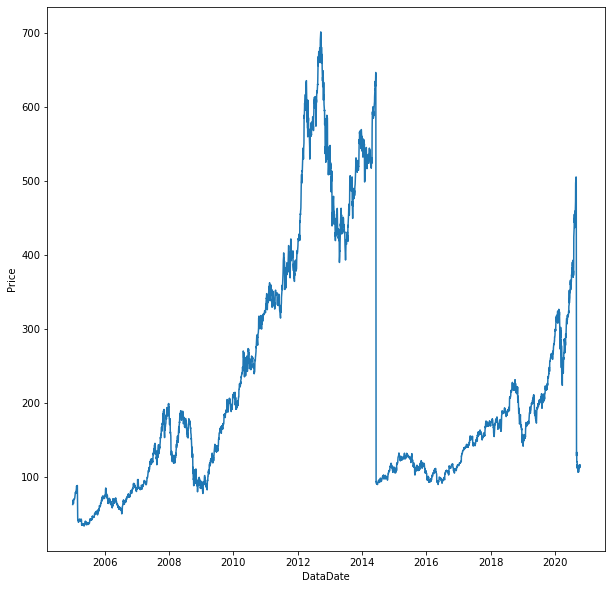

In [248]:
sns.lineplot(x=df_apple.index.get_level_values('DataDate'), y=df_apple['Price'])

In [233]:
df_apple

Price
Symbol DataDate          
AAPL   2005-04-01   40.89
       2005-04-04   41.09
       2005-04-05   41.89
       2005-04-06   42.33
       2005-04-07   43.56
...                   ...
       2020-09-24  108.22
       2020-09-25  112.28
       2020-09-28  114.96
       2020-09-29  114.09
       2020-09-30  115.81

[3980 rows x 1 columns]